In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt

from manofunkcijos import *

In [2]:
#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
    host = '88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
    )
C=DB.cursor()

In [ ]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""paste SQL command here!"""
C.execute(sql)
ans = C.fetchall()
? = list(map(list, zip(*ans)))
#? = np.transpose(ans)

In [3]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
select lytis, count(*),
avg(bdu_spalio)
from DUS2014N
group by lytis;
"""
C.execute(sql)
ans = C.fetchall()
lytis, kiekis, atlyginimas = list(map(list, zip(*ans)))
#? = np.transpose(ans)

In [4]:
pout(ans)

| 0 |       F        |     22366      |2097.37965841008|
| 1 |       M        |     22586      |2633.69374391215|


In [7]:
atlyginimas = list(map(lambda x: x/3.4528, atlyginimas))

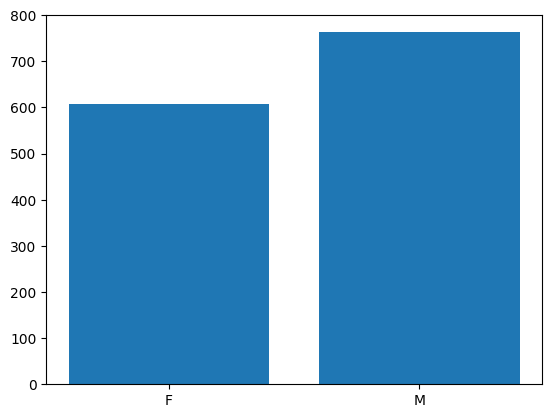

In [8]:
fig, axis = plt.subplots()

axis.bar(lytis, atlyginimas)

plt.show()

In [3]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""select *, C/(select count(*) from sa)*100 as '%' from
(select * from
(select device_brand as B, count(*) as C
from sa
where device_brand != ''
group by device_brand
order by C desc
limit 5) as T1
union all
select 'Others', count(*) as C
from sa
where device_brand not in
(select B from (select device_brand as B, count(*) as C
from sa
where device_brand != ''
group by device_brand
order by C desc
limit 5) as T2)) as T3;"""
C.execute(sql)
ans = C.fetchall()
gamintojai, kiekiai, dalis = list(map(list, zip(*ans)))

In [10]:
pout(ans)

Rodoma 5 eilutės iš 6
| 0 |    Samsung     |     36290      |    30.4927     |
| 1 |     Nokia      |     35186      |    29.5651     |
| 2 |   BlackBerry   |      7161      |     6.0170     |
| 3 |       LG       |      5194      |     4.3643     |
| 4 |  SonyEricsson  |      4090      |     3.4366     |


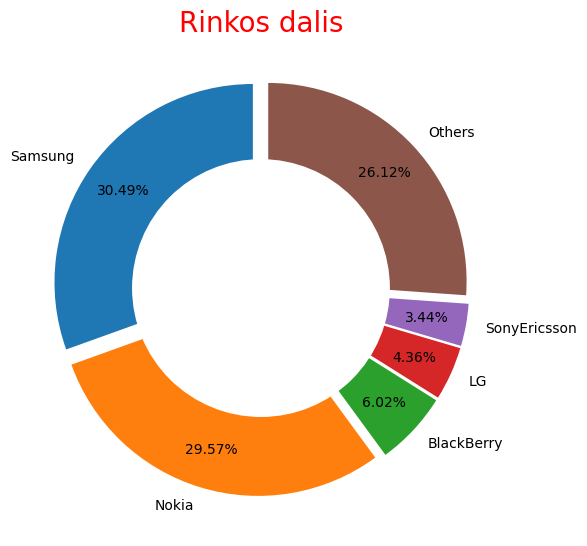

In [12]:
fig, axis = plt.subplots(figsize=(6,6))

axis.pie(dalis, 
        labels=gamintojai,
        autopct='%.2f%%',
        textprops={'fontsize':10, 'color': 'black'},
        startangle=90,
        # move the percentage inside the arcs
        pctdistance=0.8,
        # add spaces between the arcs
        explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05,]
        )

# hole
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.title('Rinkos dalis', fontsize=20, color='red')
plt.tight_layout()
plt.show()

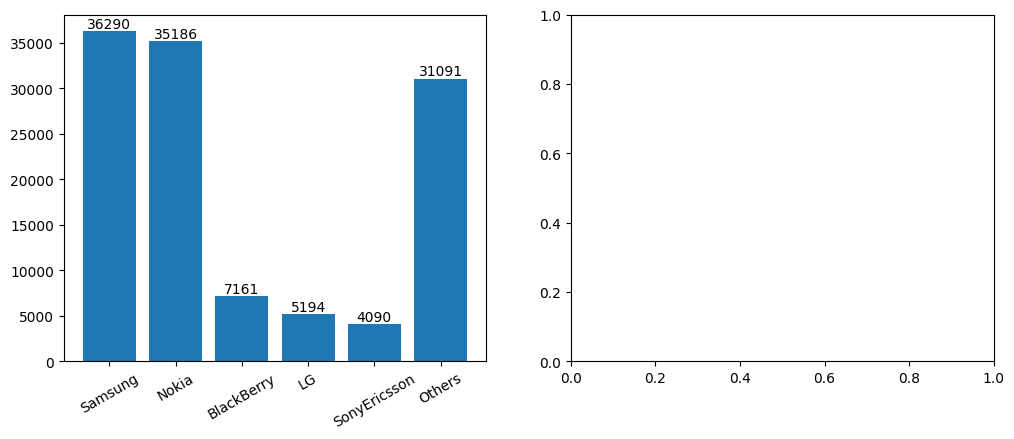

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12, 4.5])

P1 = ax1.bar(gamintojai, kiekiai)
ax1.bar_label(P1)
ax1.tick_params(axis='x', rotation=30)


plt.show()

In [18]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
-- mot 2014
select case
when amzius = '14-19' then '14-29'
when amzius = '20-29' then '14-29'
else amzius
end as Amz,
count(*) as C14
from DUS2014N
where lytis = 'F'
group by Amz;
"""
C.execute(sql)
ans = C.fetchall()
amz, motkiekis2014 = list(map(list, zip(*ans)))
#? = np.transpose(ans)

In [19]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
-- vyr 2014
select case
when amzius = '14-19' then '14-29'
when amzius = '20-29' then '14-29'
else amzius
end as Amz,
count(*) as C14
from DUS2014N
where lytis = 'M'
group by Amz;
"""
C.execute(sql)
ans = C.fetchall()
amz, vyrkiekis2014 = list(map(list, zip(*ans)))

In [21]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
-- mot 2018
select amzius as Amz, count(*) as C18
from DUS2018N
where lytis = 'F'
group by Amz;
"""
C.execute(sql)
ans = C.fetchall()
amz, motkiekis2018 = list(map(list, zip(*ans)))

In [22]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
-- vyr 2018
select amzius as Amz, count(*) as C18
from DUS2018N
where lytis = 'M'
group by Amz;
"""
C.execute(sql)
ans = C.fetchall()
amz, vyrkiekis2018 = list(map(list, zip(*ans)))

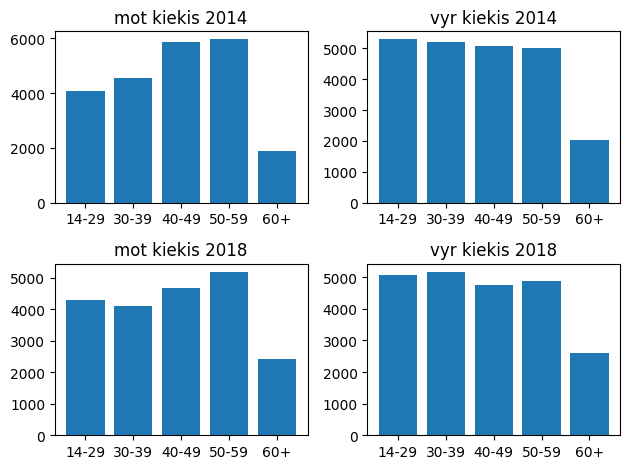

In [35]:
fig, axes = plt.subplots(2,2)

axes[0,0].bar(amz, motkiekis2014)
axes[0,1].bar(amz, vyrkiekis2014)
axes[1,0].bar(amz, motkiekis2018)
axes[1,1].bar(amz, vyrkiekis2018)

axes[0,0].set_title('mot kiekis 2014')
axes[0,1].set_title('vyr kiekis 2014')
axes[1,0].set_title('mot kiekis 2018')
axes[1,1].set_title('vyr kiekis 2018')


plt.tight_layout()
plt.show()

In [ ]:
# 2018 metams, parodykite vaizdžiai vidutinio atlyginimo priklausomybę
# nuo amžiaus grupės, atskirai vyrams, atskirai moterims.

In [9]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
select avg(bdu_spalio), amzius
from DUS2018N
where lytis = 'F'
group by amzius;
"""
C.execute(sql)
ans = C.fetchall()
atlmot, amz = list(map(list, zip(*ans)))

In [10]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
select avg(bdu_spalio), amzius
from DUS2018N
where lytis = 'M'
group by amzius;
"""
C.execute(sql)
ans = C.fetchall()
atlvyr, amz = list(map(list, zip(*ans)))

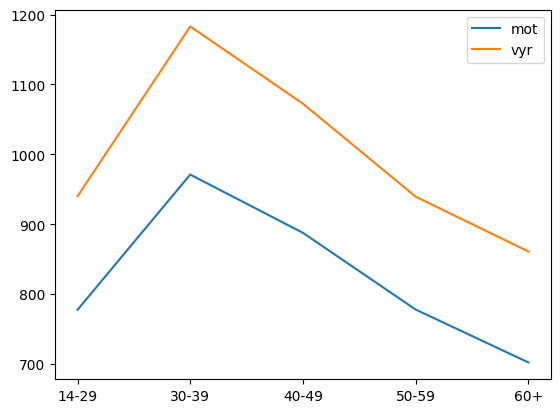

In [23]:
plt.plot(amz, atlmot, label='mot')
plt.plot(amz, atlvyr, label='vyr')
plt.legend(loc='best')
plt.show()

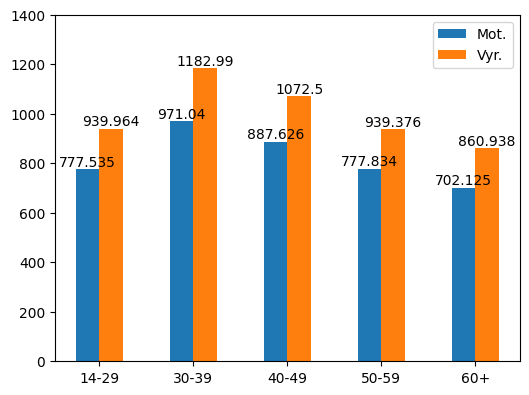

In [12]:
fig, axis = plt.subplots(figsize=[6,4.5])

x = np.arange(0,len(amz))
w = 0.25
B1 = axis.bar(x-w/2,atlmot, label='Mot.', width=w)
axis.bar_label(B1)
B2 = axis.bar(x+w/2, atlvyr, label='Vyr.', width=w)
axis.bar_label(B2)

axis.set_xticks(x)
axis.set_xticklabels(amz)
axis.set_ylim(0, 1400)

axis.legend(loc='best')
plt.show()

In [9]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
select gamintojas, count(*) as kiekis,
avg(cast(replace(price, ' ', '') as float)) as kaina,
avg(cast(replace(rida, ' ', '') as float)) as rid,
2024-avg(cast(substring(pagaminimo_data, 1, 4) as float)) as amzius
from autopliuslt
where rida != 'nenurodyta'
group by gamintojas
order by kiekis desc
limit 5;
"""
C.execute(sql)
ans = C.fetchall()
gamintojas, kiekis, kaina, rida, amzius = list(map(list, zip(*ans)))

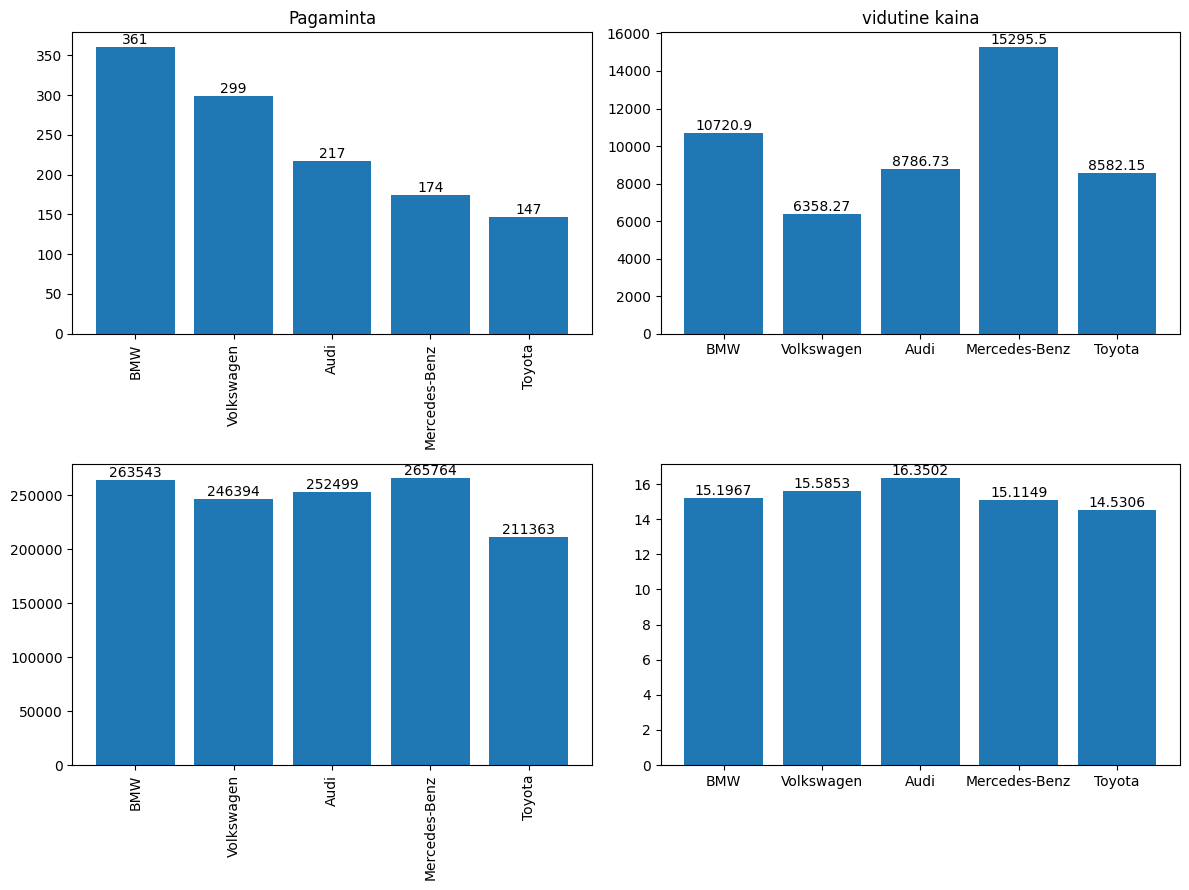

In [15]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(12,9))

P1 = ax1.bar(gamintojas, kiekis)
ax1.tick_params(axis='x', rotation=90)
ax1.bar_label(P1)
ax1.set_title('Pagaminta')


P2 = ax2.bar(gamintojas, kaina)
ax2.bar_label(P2)
ax2.set_title('vidutine kaina')

P3 = ax3.bar(gamintojas, rida)
ax3.tick_params(axis='x', rotation=90)
ax3.bar_label(P3)
ax3.set_label('vidutine rida')

P4 = ax4.bar(gamintojas, amzius)
ax4.bar_label(P4)
ax4.set_label('vidutinis amzius')




plt.tight_layout()
plt.show()

In [ ]:
# -- Sugrupuokite automobilius pagal jų amžių, ir suraskite
# -- vidutinę kainą kiekvienam amžiui.
# -- Ar didėjant automobilių amžiui, jų kaina yra linkusi mažėti?
# -- Pateikite vizualizaciją, atsakančią į pateiktą klausimą.



In [4]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
select
count(*) as kiekis,
round(2024-cast(substring(pagaminimo_data, 1, 4) as float)) as amzius,
round(avg(cast(replace(price, ' ', '') as float))) as kaina
from autopliuslt
group by amzius asc;
"""
C.execute(sql)
ans = C.fetchall()
kiekis, amzius, kaina = list(map(list, zip(*ans)))

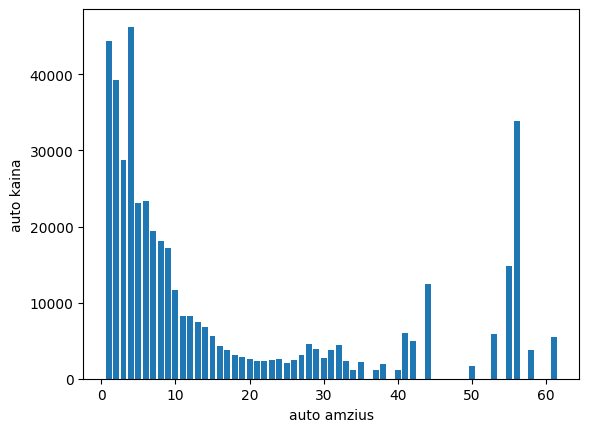

In [5]:
fig, axes = plt.subplots()

axes.bar(amzius, kaina)
axes.set_xlabel('auto amzius')
axes.set_ylabel('auto kaina')

plt.show()

In [ ]:
# -- Sugrupuokite automobilius pagal ridą, intervalais kas 5000 km, ir suraskite vidutinę kainą
# -- kiekviename intervale. Apvalinimas turi būti į
# -- didesnę pusę: 500 km turi tapti 5000 km.
# -- Ar didėjant ridai, automobilių kaina yra linkusi mažėti?
# -- Pateikite vizualizaciją, atsakančią į pateiktą klausimą.



# select Rida, round(avg(Kaina), 2) as P
# from
# (select 
# ceil(cast(replace(replace(rida, ' ', ''), 'km', '') as float) / 5000.0) * 5000.0
# as Rida,
# cast(replace(price, ' ', '') as float) as Kaina
# from autopliuslt
# where rida != 'Nenurodyta')
# as T
# group by Rida;

In [13]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
select Rida, round(avg(Kaina), 2) as P
from
(select 
ceil(cast(replace(replace(rida, ' ', ''), 'km', '') as float) / 5000.0) * 5000.0
as Rida,
cast(replace(price, ' ', '') as float) as Kaina
from autopliuslt
where rida != 'Nenurodyta')
as T
group by Rida;
"""
C.execute(sql)
ans = C.fetchall()
rida, kaina = list(map(list, zip(*ans)))

C:\Users\tevyn\AppData\Local\Temp\ipykernel_10576\4010579855.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axis.legend(loc='best')


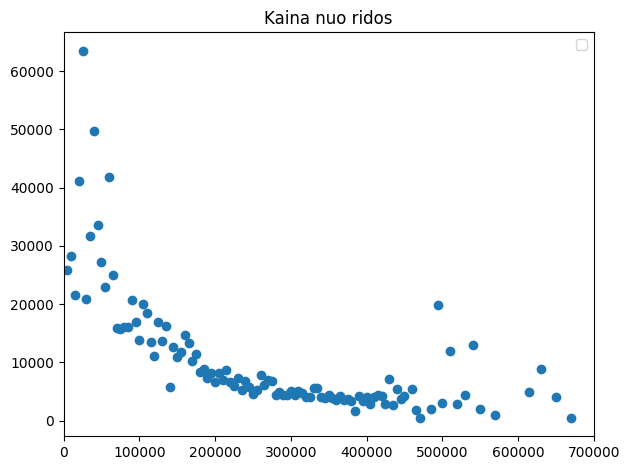

In [14]:
fig, axis = plt.subplots()

axis.scatter(rida, kaina)
axis.set_xlim(0,0.7e6)
axis.set_title('Kaina nuo ridos')
axis.legend(loc='best')
fig.tight_layout()


plt.show()